<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem1. Short Question

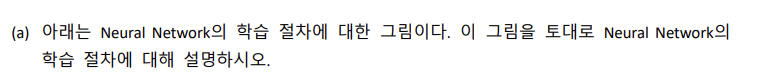

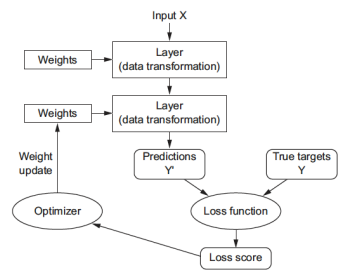

* 심층신경망 : 입력층과 출력층 사이에 다수의 은닉층을 포함하여 다양한 비선형적 관계를 학습할 수 있음
* 신경망 학습의 목적 : 전체 네트워크의 층과 층 사이에서의 연산에 사용되는 모든 가중치들의 최적값을 찾는 것이며 모델에 따라 정의한 LOSS가 충분히 줄어들 때까지 가중치의 업데이트를 반복하는 것


[학습 과정 - 다음의 절차를 정해진 횟수만큼 반복]
1. 배치 사이즈만큼의 훈련 샘플 (x,y)를 가져와 입력층에 데이터 x를 입력한다.
2. 전체 네트워크를 따라 가중치(weight)를 곱하고 활성함수를 거쳐 입력 데이터를 변환하고 출력값 yhat을 계산한다.
3. 출력된 yhat과 실제 y값의 오차를 사용해 현재 배치 안에서 평균 LOSS를 계산한다 (회귀 : MSE, 분류 : Cross entropy)
4. 출력층부터 입력층까지 역방향으로 되돌아가며 가중치 파라미터에 대한 LOSS의 그래디언트를 계산하고, LOSS가 줄어드는 방향으로 가중치를 업데이트
5. 다음 배치 사이즈만큼의 훈련 샘플을 가져와 반복한다.

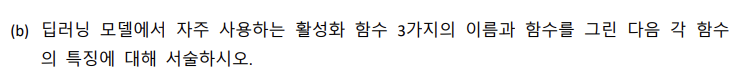

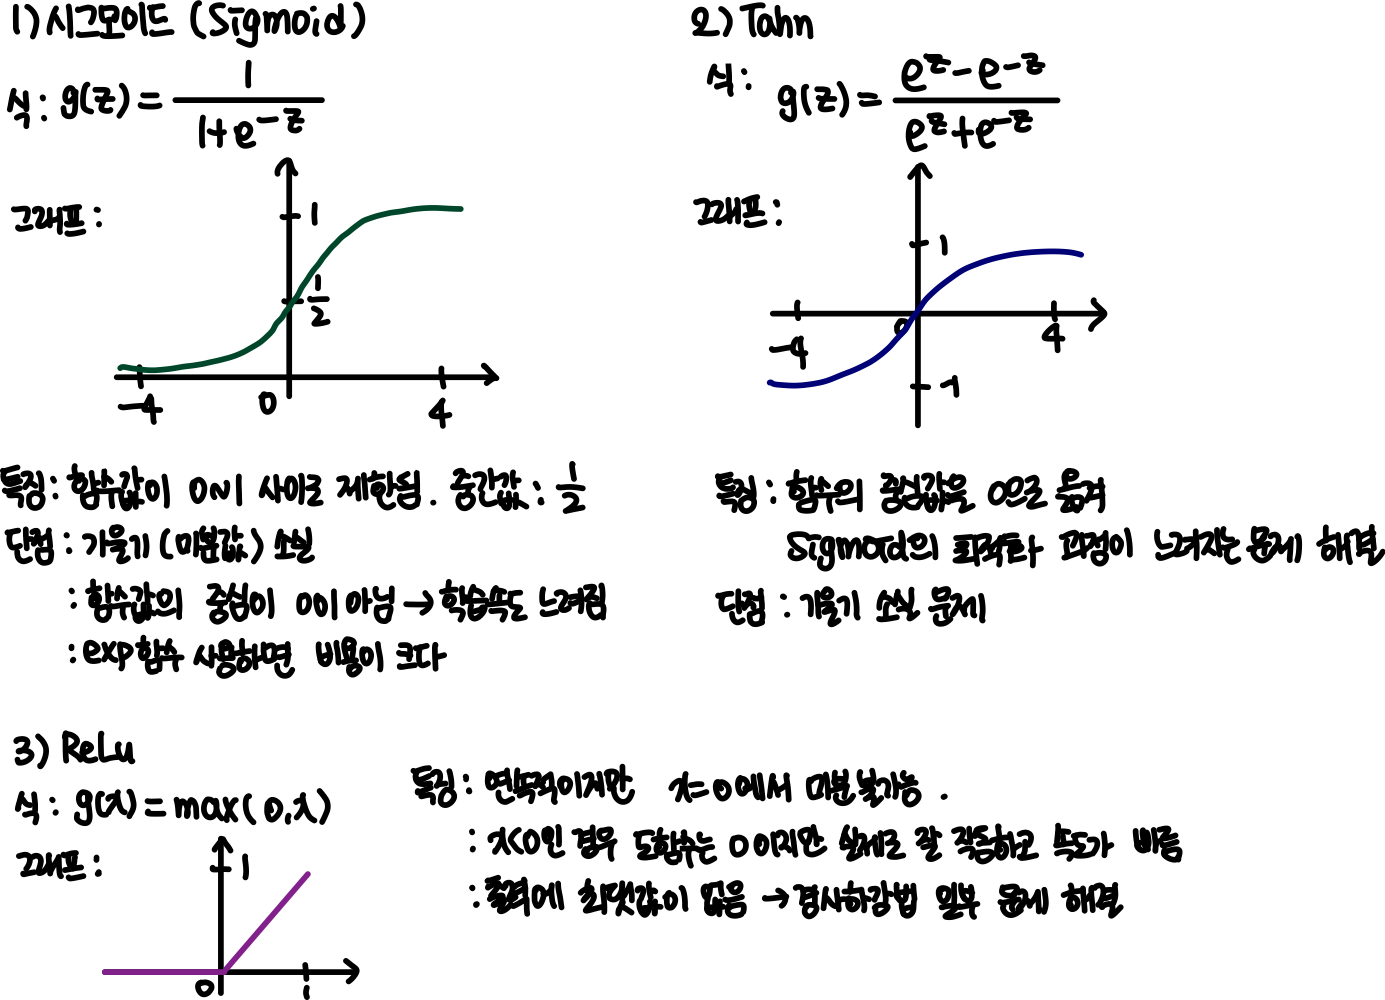

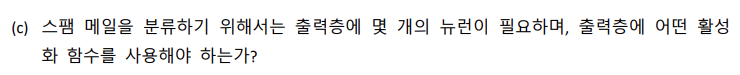

스팸 메일을 분류할 때는 스팸 메일인지 아닌지를 다루는 이진 분류를 사용한다.

이진 분류 문제의 경우 로지스틱 활성화 함수를 가진 하나의 출력 뉴런만 필요하다.

-> 필요한 뉴런 : 1개

-> 출력층 활성화 함수 : 로지스틱

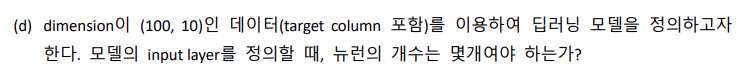

데이터가 10개의 특성(feature)을 갖고 있기 때문에 뉴런 개수는 10개여야 한다.

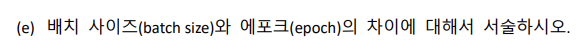

1. 배치사이즈 : 전체 훈련 데이터 셋을 여러 작은 그룹으로 나누었을 때 배치 사이즈는 하나의 소그룹에 해당되는 데이터 수를 의미한다.

ex) 전체 데이터 수가 1000개이고 한 번에 100개씩 나눠서 훈련한다고 하면, batch size는 10이다.


2. 에포크 : 전체 훈련 셋이 신경망을 통과한 횟수를 의미한다.

ex) 전체 데이터 개수가 1000인 데이터 셋을 3번에 걸쳐서 모델을 학습하면 epoch는 3이다.

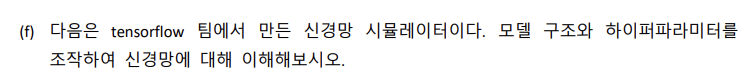

###Problem2. Regression

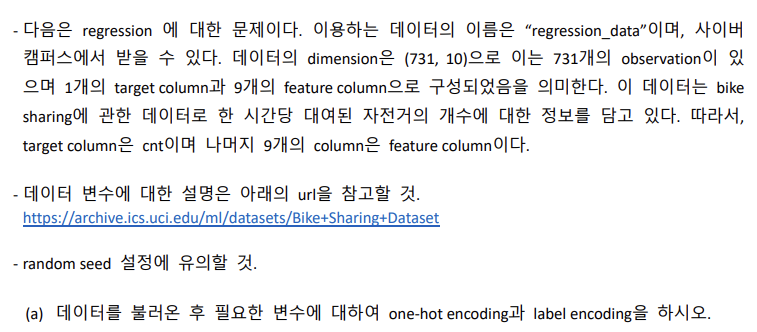

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#패키지
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
#데이터 불러오기
rdata = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/빅분방/과제/regression_data.csv')

In [ ]:
rdata.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


In [ ]:
#원핫인코딩
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
rdata = pd.get_dummies(data=rdata, columns=cat, prefix=cat)

In [ ]:
rdata.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


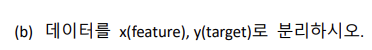

In [ ]:
X = rdata.drop(['cnt'], axis=1)
y = rdata['cnt']

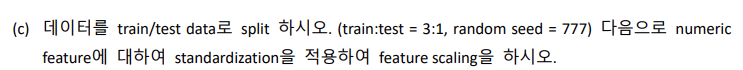

In [ ]:
#데이터 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 777)

In [ ]:
#standardization
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

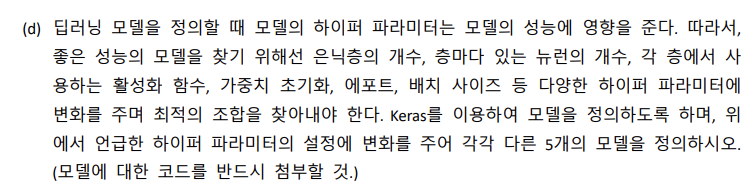

In [ ]:
##model1
#building model
model1 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(64,activation="relu",
                          input_dim=(len(rdata.columns)-1)),

    #hidden layer
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1,activation='linear'),
])

#model compile
model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

#training model
history = model1.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [ ]:
##model2
#building model
model2 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(256,activation="relu",
                          input_dim=(len(rdata.columns)-1)),

    #hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1,activation='linear'),
])

#model compile
model2.compile(optimizer='adam',loss='mse',metrics=['mse'])

#training model
history = model2.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [ ]:
##model3
#building model
model3 = tf.keras.Sequential([
    #hidden layer
    tf.keras.layers.Dense(64,activation='relu',input_shape=(33,)),
    tf.keras.layers.Dense(64,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1,activation='linear'),
])

#model compile
model3.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss='mse',
               metrics=['mae','mse'])

#training model
history = model3.fit(X_train_stan, y_train, batch_size=32,
                     epochs=1000, validation_split=0.2, verbose=0)

In [ ]:
##model4
#building model
model4 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(256,activation='relu',
                          input_dim=(len(rdata.columns)-1),
                          kernel_initializer = "he_normal"),

    #hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1,activation='linear'),
])

#model compile
model4.compile(optimizer='adam',loss='mse',metrics=['mse'])

#training model
history = model4.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [ ]:
##model5
#building model
model5 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(256,activation='relu',
                          input_dim=(len(rdata.columns)-1)),
    tf.keras.layers.Dropout(0.2),

    #hidden layer
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    #output layer
    tf.keras.layers.Dense(1,activation='linear'),
])

#model compile
model5.compile(optimizer='adam',loss='mse',metrics=['mse'])

#training model
history = model5.fit(X_train_stan, y_train, batch_size=32,
                     epochs=500, validation_split=0.2, verbose=0)

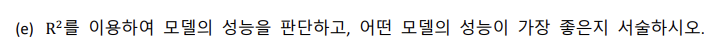

In [ ]:
#model1
r2_score(y_test,model1.predict(X_test_stan))

6/6 [==============================] - 0s 3ms/step


0.8147000878450393

In [ ]:
#model2
r2_score(y_test,model2.predict(X_test_stan))

6/6 [==============================] - 0s 3ms/step


0.8316527516915636

In [ ]:
#model3
r2_score(y_test,model3.predict(X_test_stan))

6/6 [==============================] - 0s 2ms/step


0.8364034000570334

In [ ]:
#model4
r2_score(y_test,model4.predict(X_test_stan))

6/6 [==============================] - 0s 3ms/step


0.8353383486966202

In [ ]:
#model5
r2_score(y_test,model5.predict(X_test_stan))

6/6 [==============================] - 0s 4ms/step


0.828998804171979

각 모델의 R^2 값이 큰 차이를 보이지는 않지만, 모델 3의 R^2가 0.836으로 가장 1에 가깝기 때문에 모델 3의 성능이 가장 좋다고 할 수 있다.

###Prblem3. Classification

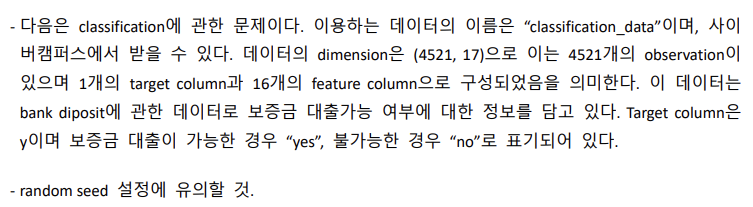

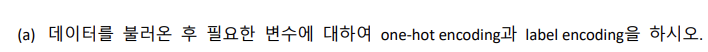

In [3]:
#데이터 불러오기
cdata = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/빅분방/과제/classification_data.csv', sep=';')

In [ ]:
cdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#라벨인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cdata['y']=encoder.fit_transform(cdata['y'])

#원핫인코딩
cat = ['job', 'marital','education','default','housing','loan','contact',
       'month','poutcome']
cdata = pd.get_dummies(data=cdata, columns=cat, prefix=cat)

In [ ]:
cdata.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


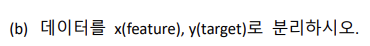

In [5]:
X = cdata.drop('y', axis=1)
y = cdata['y']

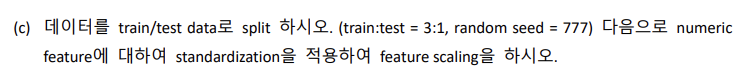

In [42]:
#데이터 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 777)

In [43]:
#standardization
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

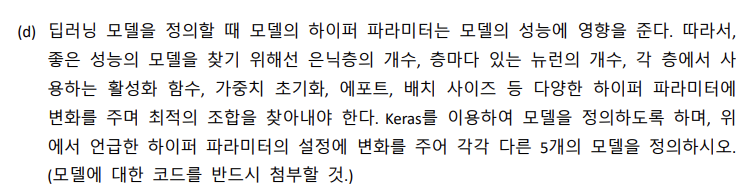

In [11]:
##model1
#building model
model1 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(64,activation="relu",
                          input_shape=(len(cdata.columns)-1,)),

    #hidden layer
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),

    #output layer
    tf.keras.layers.Dense(2,activation='softmax'),
])

#model compile
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#training model
history = model1.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [18]:
##model2
#building model
model2 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(units=256,activation="relu",
                          input_dim=(len(cdata.columns)-1)),

    #hidden layer
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),

    #output layer
     tf.keras.layers.Dense(units=2, activation="softmax"),
])

#model compile
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training model
history = model2.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [34]:
##model3
#building model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation="relu", input_shape=(51,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=7, activation="softmax")
])

#model compile
model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model training
early_stop = tf.keras.callbacks.EarlyStopping(patience=6, 
                                              restore_best_weights=True,
                                              monitor='val_loss')
history = model3.fit(X_train_stan, y_train, batch_size=32,
                     epochs=100, validation_split=0.2, verbose=0)

In [39]:
##model4
#building model
model4 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(256,activation='relu',
                          input_dim=(len(cdata.columns)-1),
                          kernel_initializer = "he_normal"),

    #hidden layer
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),

    #output layer
    tf.keras.layers.Dense(units=2, activation="softmax")
])

#model compile
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training model
history = model4.fit(X_train_stan, y_train, batch_size=32,
                     epochs=500, validation_split=0.2, verbose=0)

In [44]:
##model5
#building model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation="relu", 
                          input_shape=(51,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=7, activation="softmax")
])

#model compile
model5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model training
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, 
                                              restore_best_weights=True,
                                              monitor='val_loss')
history = model5.fit(X_train_stan, y_train, batch_size=32,
                     epochs=300, validation_split=0.2, verbose=0)

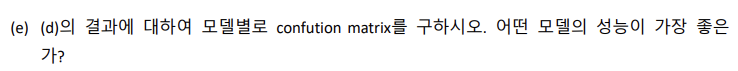

In [13]:
#model1
model1.evaluate(X_test_stan, y_test)[1]

36/36 [==============================] - 0s 5ms/step - loss: 1.2477 - accuracy: 0.8798


0.8797524571418762

In [12]:
#model1
y_test = pd.DataFrame(y_test)
y_test_c = y_test.iloc[:,0]
y_pred = model1.predict(X_test_stan)

metrics.confusion_matrix(y_pred.argmax(axis=1), y_test_c)

36/36 [==============================] - 16s 2ms/step


array([[954,  76],
       [ 60,  41]])

In [19]:
#model2
model2.evaluate(X_test_stan, y_test)[1]

36/36 [==============================] - 0s 2ms/step - loss: 1.9617 - accuracy: 0.8851


0.8850574493408203

In [21]:
#model2
y_test = pd.DataFrame(y_test)
y_test_c = y_test.iloc[:,0]
y_pred = model2.predict(X_test_stan)

metrics.confusion_matrix(y_pred.argmax(axis=1), y_test_c)

36/36 [==============================] - 0s 3ms/step


array([[957,  73],
       [ 57,  44]])

In [35]:
#model3
model3.evaluate(X_test_stan, y_test)[1]

36/36 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.8815


0.8815208077430725

In [36]:
#model3
y_test = pd.DataFrame(y_test)
y_test_c = y_test.iloc[:,0]
y_pred = model3.predict(X_test_stan)

metrics.confusion_matrix(y_pred.argmax(axis=1), y_test_c)

36/36 [==============================] - 0s 2ms/step


array([[952,  72],
       [ 62,  45]])

In [40]:
#model4
model4.evaluate(X_test_stan, y_test)[1]

36/36 [==============================] - 0s 1ms/step - loss: 4.5846 - accuracy: 0.8798


0.8797524571418762

In [41]:
#model4
y_test = pd.DataFrame(y_test)
y_test_c = y_test.iloc[:,0]
y_pred = model4.predict(X_test_stan)

metrics.confusion_matrix(y_pred.argmax(axis=1), y_test_c)

36/36 [==============================] - 0s 1ms/step


array([[952,  74],
       [ 62,  43]])

In [45]:
#model5
model5.evaluate(X_test_stan, y_test)[1]

36/36 [==============================] - 0s 2ms/step - loss: 4.5041 - accuracy: 0.8859


0.8859416246414185

In [46]:
#model5
y_test = pd.DataFrame(y_test)
y_test_c = y_test.iloc[:,0]
y_pred = model5.predict(X_test_stan)

metrics.confusion_matrix(y_pred.argmax(axis=1), y_test_c)

36/36 [==============================] - 0s 2ms/step


array([[963,  78],
       [ 51,  39]])

모든 모델의 성능이 비슷하지만, 모델 5의 accuracy 값이 0.8859로 가장 크다. 또한, confusion matrix에서도 정분류된 비율이 가장 크기 때문에 모델 5를 가장 성능이 좋은 모델이라고 할 수 있다.